<a href="https://colab.research.google.com/github/Linda0319/Practice_dataset/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' Import keras to build a DL model '''
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 載入Mnist手寫辨識資料、資料前處理

In [ ]:
# get_mnist_data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


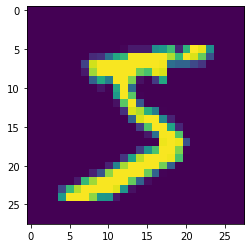

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[0]

5

In [ ]:
def plot_images_labels_training(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(6, 8)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

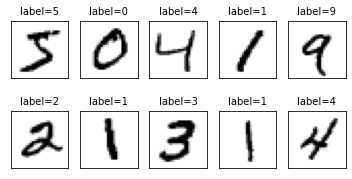

In [ ]:
plot_images_labels_training(x_train,y_train,[],0,10)

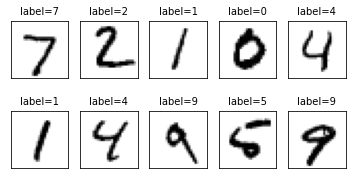

In [ ]:
plot_images_labels_training(x_test,y_test,[],0,10)

- **資料轉化**

In [ ]:
def data_transform():

      x_train4D = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
      x_test4D = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

      #灰階圖片數值為0-255間，標準化，將數值縮小到0~1
      x_train4D_normalize = x_train4D/255 
      x_test4D_normalize = x_test4D/255

      # convert class vectors to binary class matrices，Onehot encoding
      y_trainOneHot = np_utils.to_categorical(y_train)
      y_testOneHot = np_utils.to_categorical(y_test)
      return x_train4D_normalize,y_trainOneHot, x_test4D_normalize, y_testOneHot

In [ ]:
x_train4D_normalize,y_trainOneHot, x_test4D_normalize, y_testOneHot = data_transform()
print('x_train_image:', x_train4D_normalize.shape)
print('y_train_label:', y_trainOneHot.shape)

print('x_test_image:', x_test4D_normalize.shape)
print('y_test_label:', y_testOneHot.shape)

x_train_image: (60000, 28, 28, 1)
y_train_label: (60000, 10)
x_test_image: (10000, 28, 28, 1)
y_test_label: (10000, 10)


# **建立模型**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

# **CNN**

In [ ]:
#Define Model
model = Sequential([
    Conv2D(16, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)), 
    Conv2D(36, kernel_size=(5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
#Compile
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 36)        14436     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 36)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 36)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7056)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               903296    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [ ]:
train_history = model.fit(x=x_train4D_normalize, y=y_trainOneHot, validation_split=0.2, batch_size=500, epochs=15, verbose=2)

Epoch 1/15
96/96 - 2s - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0444 - val_accuracy: 0.9925
Epoch 2/15
96/96 - 1s - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0434 - val_accuracy: 0.9926
Epoch 3/15
96/96 - 1s - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0457 - val_accuracy: 0.9925
Epoch 4/15
96/96 - 1s - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.0449 - val_accuracy: 0.9927
Epoch 5/15
96/96 - 1s - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0458 - val_accuracy: 0.9927
Epoch 6/15
96/96 - 1s - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0459 - val_accuracy: 0.9931
Epoch 7/15
96/96 - 1s - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0480 - val_accuracy: 0.9933
Epoch 8/15
96/96 - 1s - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0498 - val_accuracy: 0.9918
Epoch 9/15
96/96 - 1s - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0535 - val_accuracy: 0.9927
Epoch 10/15
96/96 - 1s - loss: 0.0029 - accuracy: 0.9989 - val_loss: 0.0505 - val_accuracy: 0.9931
Epoch 11/15
96/96 -

In [ ]:
# Plot graph between training and validation loss
images_dir = '/content/drive/MyDrive/Colab Notebooks/images/'
def show_train_history(train_loss, val_loss, filename):
    plt.plot(train_history.history[train_loss])
    plt.plot(train_history.history[val_loss])
    plt.title('Training and Validation Losses')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    #plt.show()
    plt.savefig(f'{images_dir}'+ 'MNIST_DNN_' + filename +'.jpg')

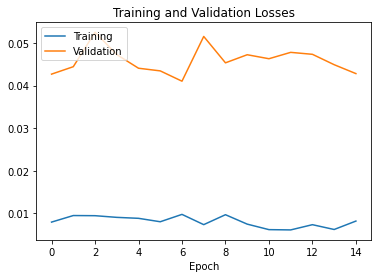

In [ ]:
show_train_history('loss','val_loss', 'train_loss_1')

In [ ]:
# Plot graph between training and validation accuracy
images_dir = '/content/drive/MyDrive/Colab Notebooks/images/'
def show_train_history(train_acc, val_acc, filename):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[val_acc])
    plt.title('Training and Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    #plt.show()
    plt.savefig(f'{images_dir}'+ 'MNIST_DNN_' + filename +'.jpg')

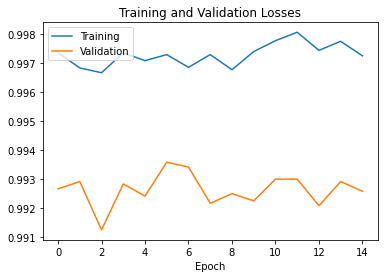

In [ ]:
show_train_history('accuracy','val_accuracy','train_accuracy_1')

# **模型評估與預測**

In [ ]:
scores = model.evaluate(x_test4D_normalize, y_testOneHot)
scores[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.0275 - accuracy: 0.9938


0.9937999844551086

In [ ]:
y_pred_prob = model.predict_proba(x_test4D_normalize)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
y_pred_prob.shape

(10000, 10)

In [ ]:
y_pred_class = model.predict_classes(x_test4D_normalize)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_pred_class[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

- 看ROC_AUC分數

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(np.array(y_test),y_pred_prob, multi_class='ovr',average='weighted')

0.9999737556228316

- 看label與predict圖

In [ ]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(10, 12)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

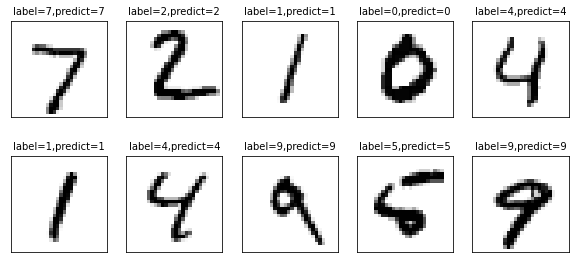

In [ ]:
plot_images_labels_prediction(x_test,y_test,y_pred_class,idx=0)

- 用矩陣看預測結果

In [ ]:
pd.crosstab(y_test,y_pred_class,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,1,1,1,0
1,0,1133,1,0,0,0,0,1,0,0
2,2,1,1025,0,0,0,0,4,0,0
3,0,0,1,1004,0,4,0,0,1,0
4,0,0,0,0,980,0,0,0,0,2
5,0,0,0,4,0,887,1,0,0,0
6,2,2,0,1,3,1,947,0,2,0
7,0,0,4,0,0,0,0,1022,1,1
8,1,0,1,1,0,0,0,0,968,3


In [ ]:
df = pd.DataFrame({'label':y_test, 'predict':y_pred_class})

In [ ]:
df[(df.label==9)&(df.predict==4)]

,label,predict
1232,9,4
1414,9,4
1901,9,4
2293,9,4
2414,9,4
2720,9,4
3985,9,4
4761,9,4
4823,9,4


In [ ]:
df[(df.label==9)&(df.predict==4)].index

Int64Index([1232, 1414, 1901, 2293, 2414, 2720, 3985, 4761, 4823], dtype='int64')

IndexError: ignored

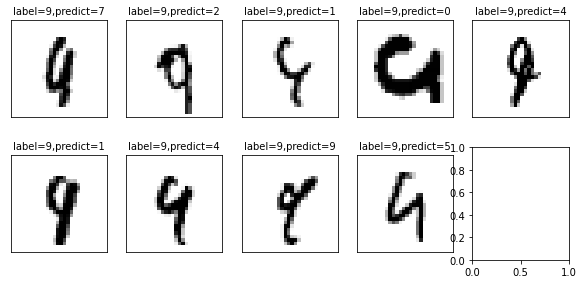

In [ ]:
# 看預測錯誤的圖
plot_images_labels_prediction(
    [x_test[i] for i in df[(df.label==9)&(df.predict==4)].index],
    [y_test[i] for i in df[(df.label==9)&(df.predict==4)].index],
    y_pred_class,idx=0)

- 模型存檔

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/models/MNIST_DNN_model.h5')

In [ ]:
# 確認模型是否載入成功
from keras.models import load_model
try:
    model = load_model('/content/drive/MyDrive/Colab Notebooks/models/MNIST_DNN_model.h5')
    print("載入模型成功!繼續訓練模型")
except :
    print("載入模型失敗!開始訓練一個新模型")